In [1]:
import os
import json
import yaml

In [2]:
import sys 
import torch
sys.path.append('..')

import os
import pytorch_lightning as pl
from src.datasets.vqa_rad_dataset import VQRadDataModule
from src.models.multimodal.flamingo_module import FlamingoModule

from pytorch_lightning import Trainer, seed_everything
import torchvision.transforms as T

from pytorch_lightning.loggers import CometLogger
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning import loggers as pl_loggers

from src.utils.utils import load_config

In [3]:
if __name__ == '__main__':
    seed_everything(42, workers=True)

    img_mean = (0.48,0.48,0.48)
    img_std = (0.265,0.265,0.265)

    augmentations = {'train':
        T.Compose(
        [   
            T.Resize((224,224)),
            T.RandomRotation(10),
            T.ToTensor(),
            T.Normalize(mean=img_mean, std=img_std)
        ]),
        'val':
        T.Compose(
        [
            T.Resize((224,224)),
            T.RandomRotation(10),
            T.ToTensor(),
            T.Normalize(mean=img_mean, std=img_std)
        ]),
        'test':
        T.Compose(
        [
            T.Resize((224,224)),
            T.ToTensor(),
            T.Normalize(mean=img_mean, std=img_std)
        ])
    }


    args = load_config('/u/home/koksal/mlmi-vqa/configs','config.yaml')


    mimic_datamodule = VQRadDataModule(args, augmentations= augmentations)


    train_loader = mimic_datamodule.train_dataloader()
    val_loader = mimic_datamodule.val_dataloader()



    model = FlamingoModule(args) 

Global seed set to 42


Load memıory False
There are 2248 QA pairs in VQA-RAD dataset
Num unique answers vqa-rad  374
Num unique answers vqa-rad  139
Num unique answers vqa-rad  111
Clip architecture is being loaded
Clip pretrained weights are being loaded
Flamingo is being initialized with  gpt2  as language model
Perceiver Resampler is being initialized
Perceiver attention is created with  dim :  768 dim_head:  64
Perceiver attention is created with  dim :  768 dim_head:  64
Perceiver Resampler is initialized
img encoder outdim initialized
Layers are initializzed
GPT 2 Weights are loading...
Loaded GPT2 weights and Embeddings num_weights loaded :  156
Flamingo is initalized
Self classifier  Sequential(
  (0): LayerNorm()
  (1): Dropout(p=0.1, inplace=False)
  (2): Linear(in_features=1536, out_features=374, bias=True)
)


In [5]:
dataloader_val = mimic_datamodule.val_dataloader()

In [6]:
for batch in dataloader_val:
    print(batch)
    break

{'answer': ['ring enhancing lesion in the left occipital lobe', 'no', 'yes', 'yes', 'no', 'retrocardiac', 'yes', 'no', 'pineal region', 'kidneys', 'no', 'no', 'hypodense', 'yes', 'basilar artery', 'pa', 'chest x-ray', 'left cerebellum', 'enlarged', 'axial', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'in the vasculature', 'left hemisphere', 'ms plaques', 'yes', 'yes', 'right', 'axial', 'yes', 'left mid lung', 'below the 7th rib in the right lung.', 'abnormal', 'yes', 'yes', 'yes', 'no', 'less dense', 'hydropneumothorax', 'yes', 'right convexity', 'white matter', 'yes', 'all three vascular distributions', 'no', 'right temporal lobe', 'pancreas', 'no', 'yes', 'right frontal lobe', 'no', 'cystic', 'yes', 'no', 'hip bones', 'yes', 'no', 'yes'], 'image_name': ['synpic49027.jpg', 'synpic27277.jpg', 'synpic21700.jpg', 'synpic40096.jpg', 'synpic27402.jpg', 'synpic19232.jpg', 'synpic55245.jpg', 'synpic27646.jpg', 'synpic47020.jpg', 'synpic27576.jpg', 'synpic29263.jpg', 'synpic19118.jpg', 

In [10]:
with open(os.path.join(args['dataset']['vqa_rad_path'],'VQA-RAD_public.json'), 'r') as f:
        sample_dicts = json.load(f)

In [15]:
len(sample_dicts)

2248

In [12]:
test_set = []
train_set = []
for sample in sample_dicts:
    if sample['phrase_type'].startswith('test'):
        test_set.append(sample)
    else:
        train_set.append(sample)


In [13]:
print('Lenght of Training Set ',len(train_set), 'length test set', len(test_set))

Lenght of Training Set  1797 length test set 451


In [11]:
sample_dicts[0]

{'qid': '0',
 'phrase_type': 'freeform',
 'qid_linked_id': '03f451ca-de62-4617-9679-e836026a7642',
 'image_case_url': 'https://medpix.nlm.nih.gov/case?id=48e1dd0e-8552-46ad-a354-5eb55be86de6',
 'image_name': 'synpic54610.jpg',
 'image_organ': 'HEAD',
 'evaluation': 'not evaluated',
 'question': 'Are regions of the brain infarcted?',
 'question_rephrase': 'NULL',
 'question_relation': 'NULL',
 'question_frame': 'NULL',
 'question_type': 'PRES',
 'answer': 'Yes',
 'answer_type': 'CLOSED'}

In [9]:
import sys 
import torch
sys.path.append('..')

import os
import pytorch_lightning as pl
from src.datasets.vqa_rad_dataset import VQRadDataModule
from src.models.multimodal.flamingo_module import FlamingoModule

from pytorch_lightning import Trainer, seed_everything
import torchvision.transforms as T

from pytorch_lightning.loggers import CometLogger
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning import loggers as pl_loggers

from src.utils.utils import load_config

if __name__ == '__main__':
    seed_everything(42, workers=True)

    img_mean = (0.48,0.48,0.48)
    img_std = (0.265,0.265,0.265)

    augmentations = {'train':
        T.Compose(
        [   
            T.Resize((224,224)),
            T.RandomRotation(10),
            T.ToTensor(),
            T.Normalize(mean=img_mean, std=img_std)
        ]),
        'val':
        T.Compose(
        [
            T.Resize((224,224)),
            T.RandomRotation(10),
            T.ToTensor(),
            T.Normalize(mean=img_mean, std=img_std)
        ]),
        'test':
        T.Compose(
        [
            T.Resize((224,224)),
            T.ToTensor(),
            T.Normalize(mean=img_mean, std=img_std)
        ])
    }


    args = load_config('/u/home/koksal/mlmi-vqa/configs','config.yaml')

    args['train']['batch_size']=1
    datamodule = VQRadDataModule(args, augmentations= augmentations)

    train_loader = datamodule.train_dataloader()
    val_loader = datamodule.val_dataloader()



    model = FlamingoModule(args) 

    if args['pretrained']:
        print("Pretrained Flamingo Model is loaded from checkpoint : ",args['pretrained'])
        model.load_state_dict(torch.load(args['pretrained'])["state_dict"])


    from pytorch_lightning.callbacks import ModelCheckpoint
    from pytorch_lightning.callbacks.early_stopping import EarlyStopping


Global seed set to 42


Load memıory False
There are 2248 QA pairs in VQA-RAD dataset
Num unique answers vqa-rad  374
Num unique answers vqa-rad  139
Num unique answers vqa-rad  111
Clip architecture is being loaded
Clip pretrained weights are being loaded
Flamingo is being initialized with  gpt2  as language model
Perceiver Resampler is being initialized
Perceiver attention is created with  dim :  768 dim_head:  64
Perceiver attention is created with  dim :  768 dim_head:  64
Perceiver Resampler is initialized
img encoder outdim initialized
Layers are initializzed
GPT 2 Weights are loading...
Loaded GPT2 weights and Embeddings num_weights loaded :  156
Flamingo is initalized
Self classifier  Sequential(
  (0): LayerNorm()
  (1): Dropout(p=0.1, inplace=False)
  (2): Linear(in_features=1536, out_features=374, bias=True)
)


In [29]:
args['pretrained'] = '/u/home/koksal/mlmi-vqa/notebooks/lightning_logs/version_3/checkpoints/epoch=2-val_acc_epoch=0.00-val_total_loss_epoch=11.29-val_loss_generation_epoch=4.15-val_classification_loss_epoch=7.14.ckpt'

In [30]:
if args['pretrained']:
    print("Pretrained Flamingo Model is loaded from checkpoint : ",args['pretrained'])
    model.load_state_dict(torch.load(args['pretrained'])["state_dict"])

Pretrained Flamingo Model is loaded from checkpoint :  /u/home/koksal/mlmi-vqa/notebooks/lightning_logs/version_3/checkpoints/epoch=2-val_acc_epoch=0.00-val_total_loss_epoch=11.29-val_loss_generation_epoch=4.15-val_classification_loss_epoch=7.14.ckpt


In [31]:

model.eval()

FlamingoModule(
  (flamingo_palm): FlamingoModel(
    (token_emb): Embedding(50261, 768)
    (wpe): Embedding(256, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (img_encoder): VisionTransformer(
      (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
      (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (transformer): Transformer(
        (resblocks): ModuleList(
          (0): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
            )
            (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (mlp): Sequential(
              (c_fc): Linear(in_features=768, out_features=3072, bias=True)
              (gelu): QuickGELU()
              (c_proj): Linear(in_features=3072, out_features=768, bias=True)
            )
            (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    

In [32]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
from transformers import GPT2Tokenizer
import numpy as np

from torch import nn as nn
import torch.nn.functional as F
def generate(image, context, cur_model, batch, ntok=20):
    for _ in range(ntok):
        out,_ = cur_model({'image': image,'input_ids': context, "index_eoq": batch["index_eoq"],
        "targets": batch["targets"],"label": batch["label"]})
        logits = out[:, -1, :]
        indices_to_remove = logits < torch.topk(logits, 10)[0][..., -1, None]
        logits[indices_to_remove] = np.NINF
        #next_tok1 = torch.multinomial(F.softmax(logits, dim=-1), num_samples=1).squeeze(1)
        #print(next_tok1.shape)
        softmax_out = F.softmax(logits, dim=-1)
        #print(softmax_out.shape)
        next_tok = torch.argmax(softmax_out,dim=-1,keepdim=False)
        #print(next_tok.shape)
        context = torch.cat([context, next_tok.unsqueeze(-1)], dim=-1)
    return context


tokenizer = datamodule.train_dataset.tokenizer

In [33]:
val_dataloader = datamodule.val_dataloader()

In [34]:
len(val_dataloader)

405

In [35]:
val_loader_iter = iter(val_dataloader)

In [36]:
batch = next(val_loader_iter)

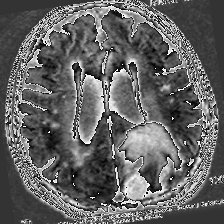

In [37]:
T.ToPILImage()(batch["image"][0])

In [38]:
batch = next(val_loader_iter)
context   = torch.tensor([tokenizer.encode("<|endoftext|> <image> question: "+batch["question"][0] + ' <EOQ>'+ ' answer:')]) 
out = generate(batch["image"], context, model, batch, ntok=20)
print("Question : ", batch["question"][0])
print("Model's answer : ",tokenizer.decode(out[0]).split('answer:')[1].split('<EOC>')[0])
print("Correct Answer: " + batch["answer"][0])

Question :  Are the patients' ribs symmetric on both sides?
Model's answer :   
Correct Answer: no


In [39]:
tokenizer.decode(out[0])

"<|endoftext|> <image> question: Are the patients' ribs symmetric on both sides? <EOQ> answer: <EOC>[PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD][PAD]"

In [40]:
datamodule.train_dataset.tokenizer.all_special_ids[datamodule.train_dataset.tokenizer.all_special_tokens.index('<image>')]

50258

: 

In [1]:
from efficientnet_pytorch import EfficientNet
image_encoder = EfficientNet.from_name('efficientnet-b0')

/u/home/koksal/.conda/envs/caghan4/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
image_encoder

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

In [15]:
image_encoder._fc = nn.Identity()

In [9]:
import torch
from torch import nn 

In [8]:
new_model = nn.Sequential(*list(image_encoder.children())[:-2])

In [18]:
image_encoder(torch.randn((1,3,224, 224))).shape

torch.Size([1, 1280])